In [1]:
import numpy as np

# Load the data
X = np.load('archive-2/Sign-language-digits-dataset/X.npy')

# flatten the X matrix
X = X.reshape(X.shape[0], -1)

Y = np.zeros((X.shape[0], 10))
Y[0:204, 9] = 1
Y[204:409, 0] = 1
Y[409:615, 7] = 1
Y[615:822, 6] = 1
Y[822:1028, 1] = 1
Y[1028:1236, 8] = 1
Y[1236:1443, 4] = 1
Y[1443:1649, 3] = 1
Y[1649:1855, 2] = 1
Y[1855:, 5] = 1

indices = np.argmax(Y, axis=1)
Y = np.expand_dims(indices, axis=1)

In [2]:
# Split data into train and test

import numpy as np
from tensorflow.keras.utils import to_categorical

data = np.concatenate((Y, X), axis=1)

np.random.shuffle(data)

# Extract features (pixel values) and labels
X = data[:, 1:]  # Pixel values
y = data[:, 0]   # Labels

# Convert labels to one-hot encoding
y_one_hot = to_categorical(y, num_classes=10)  # Assuming you have 10 classes (digits 0 to 9)

# Now, 'X' contains the pixel values, and 'y_one_hot' contains the one-hot encoded labels

# from sklearn.decomposition import PCA

# pca = PCA(n_components=2025)
# X = pca.fit_transform(X)

# Split the data into training, validation and testing sets (you may need to adjust the split ratio)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.1, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Now, you can use X_train and y_train to train your neural network, and X_test and y_test for testing.

2023-11-06 23:46:02.876047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    normalized_data = (X - mean) / std
    return normalized_data, mean, std

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# # Define the number of neurons in the hidden layers
# n_neurons_hidden1 = 500  # Number of neurons in the first hidden layer
# n_neurons_hidden2 = 250   # Number of neurons in the second hidden layer (you can adjust this as needed)

# # Create a Sequential model
# model = Sequential()

# # Input layer (4096 neurons, assuming your images are 64x64 pixels)
# model.add(Dense(2025, input_shape=(2025,)))

# # First hidden layer
# model.add(Dense(n_neurons_hidden1, activation='relu'))

# # Second hidden layer
# model.add(Dense(n_neurons_hidden2, activation='relu'))

# # Output layer (10 neurons for 10 classes)
# model.add(Dense(10, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print a summary of the model's architecture
# model.summary()


# Function to build a simple CNN model
def build_cnn_model(input_shape, num_classes):
    model = tf.keras.Sequential()
    
    # Convolutional and pooling layers
    model.add(tf.keras.layers.Conv2D(32, (7, 7), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (7, 7), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    
    # Flatten the output before fully connected layers
    model.add(tf.keras.layers.Flatten())
    
    # Fully connected layers
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    
    return model

# Example usage
input_shape = (64, 64, 1)  # Adjust the input shape to match your image size and channels
num_classes = 10  # Number of output classes

# Create the CNN model
model = cnn_model = build_cnn_model(input_shape, num_classes)

# Compile the model with an appropriate optimizer and loss function
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



2023-11-06 23:46:04.547270: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
# Assuming you have already created and compiled your model

X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

# Train the model
history = model.fit(X_train, y_train, batch_size=25, epochs=15, validation_data=(X_val, y_val))

# After training, you can evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/15
75/75 [==============================] - 11s 142ms/step - loss: 1.7854 - accuracy: 0.3590 - val_loss: 0.9274 - val_accuracy: 0.6827
Epoch 2/15
75/75 [==============================] - 11s 146ms/step - loss: 0.7378 - accuracy: 0.7628 - val_loss: 0.6668 - val_accuracy: 0.7981
Epoch 3/15
75/75 [==============================] - 11s 153ms/step - loss: 0.5134 - accuracy: 0.8431 - val_loss: 0.4866 - val_accuracy: 0.8173
Epoch 4/15
75/75 [==============================] - 13s 167ms/step - loss: 0.3865 - accuracy: 0.8879 - val_loss: 0.4267 - val_accuracy: 0.9038
Epoch 5/15
75/75 [==============================] - 13s 167ms/step - loss: 0.2749 - accuracy: 0.9229 - val_loss: 0.3301 - val_accuracy: 0.9135
Epoch 6/15
75/75 [==============================] - 12s 161ms/step - loss: 0.1862 - accuracy: 0.9407 - val_loss: 0.2712 - val_accuracy: 0.9327
Epoch 7/15
75/75 [==============================] - 11s 152ms/step - loss: 0.1531 - accuracy: 0.9558 - val_loss: 0.2534 - val_accuracy: 0.9231

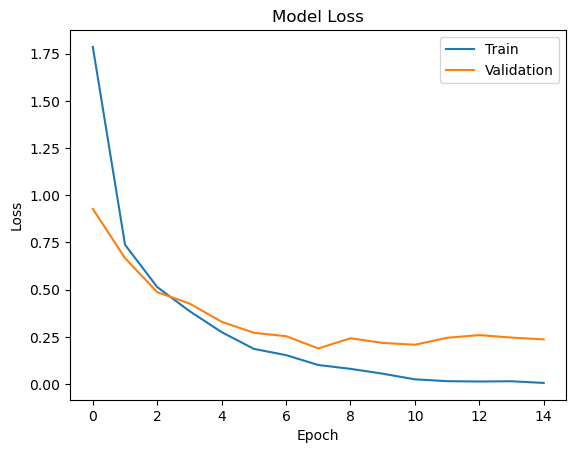

In [8]:
# plot the loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

1/1 [==============================] - 0s 17ms/step


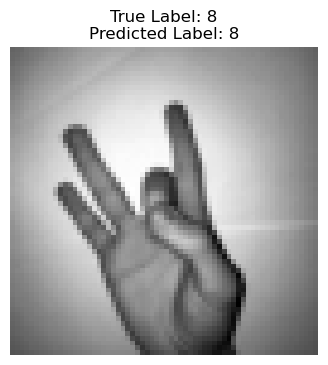

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_image_and_predict(model, X, y, class_labels):
    # Select a random index from the training set
    random_index = np.random.randint(0, len(X))
    
    # Get the image and true label
    random_image = X[random_index]
    true_label = y[random_index]
    
    # Reshape the image if it's flattened
    if random_image.shape != (64, 64):
        random_image = random_image.reshape(64, 64)
    
    # Make a prediction using the model
    # predicted = model.predict(random_image.reshape(1, -1))
    predicted = model.predict(random_image.reshape(1, 64, 64, 1))
    predicted_label = np.argmax(predicted)
    
    # Plot the image
    plt.figure(figsize=(4, 4))
    plt.imshow(random_image, cmap='gray')
    plt.title(f"True Label: {class_labels[np.argmax(true_label)]}\nPredicted Label: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()

# Assuming you have a list of class labels
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Call the function to display a random image and make a prediction
plot_random_image_and_predict(model, X_test, y_test, class_labels)
